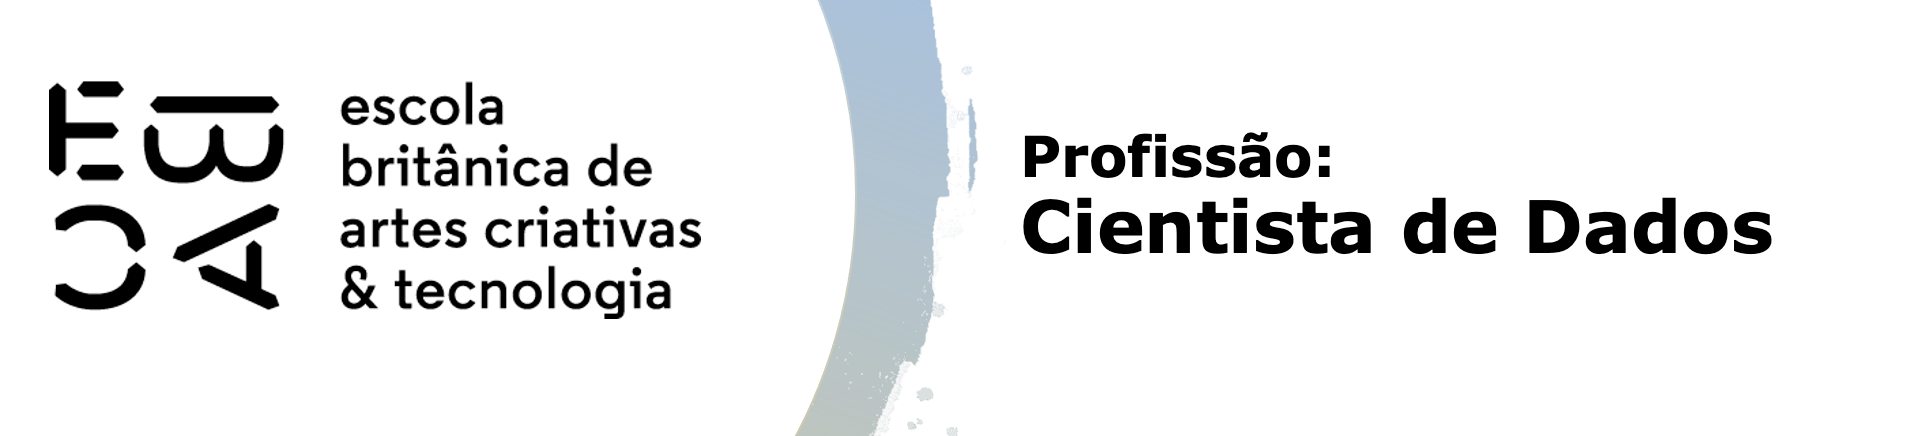

# Tarefa

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

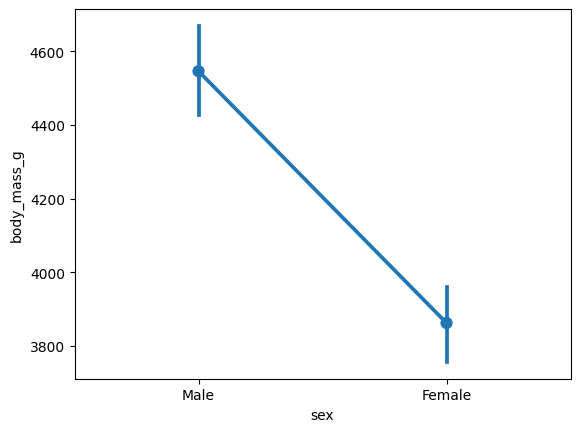

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

        count         mean         std     min     25%     50%     75%     max
sex                                                                           
Female  165.0  3862.272727  666.172050  2700.0  3350.0  3650.0  4550.0  5200.0
Male    168.0  4545.684524  787.628884  3250.0  3900.0  4300.0  5312.5  6300.0
Estatística t: 8.5417
Valor p: 0.0000
Rejeitamos H0: há diferença significativa no peso entre machos e fêmeas.


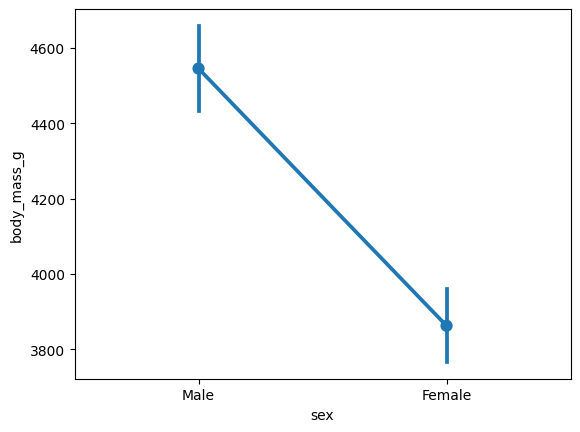

In [5]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

# Carregar dataset
pg = sns.load_dataset('penguins')

# Remover linhas com dados faltantes (NaN)
pg = pg.dropna(subset=['sex', 'body_mass_g'])

# Estatísticas descritivas
print(pg.groupby('sex')['body_mass_g'].describe())

# Visualização
sns.pointplot(data=pg, x='sex', y='body_mass_g')

# Separar os grupos
machos = pg[pg['sex'] == 'Male']['body_mass_g']
femeas = pg[pg['sex'] == 'Female']['body_mass_g']

# Teste T de duas amostras independentes (assumindo variâncias iguais)
t_stat, p_value = ttest_ind(machos, femeas, equal_var=True)

print(f'Estatística t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: há diferença significativa no peso entre machos e fêmeas.")
else:
    print("Não rejeitamos H0: não há evidência suficiente para dizer que o peso difere entre os sexos.")


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

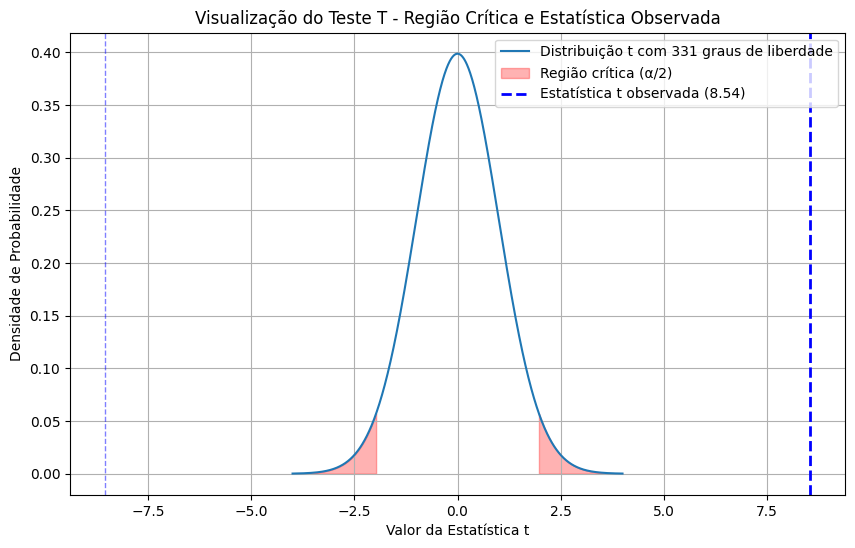

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parâmetros do teste
alpha = 0.05
n1 = len(machos)
n2 = len(femeas)
df = n1 + n2 - 2  # graus de liberdade para teste t com variância igual

# Estatística t observada do teste anterior
t_obs = t_stat

# Região crítica bilateral (valores críticos)
t_crit = t.ppf(1 - alpha/2, df)

# Valores para plotar distribuição t
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

plt.figure(figsize=(10,6))
plt.plot(x, y, label=f'Distribuição t com {df} graus de liberdade')
plt.fill_between(x, 0, y, where=(x <= -t_crit), color='red', alpha=0.3, label='Região crítica (α/2)')
plt.fill_between(x, 0, y, where=(x >= t_crit), color='red', alpha=0.3)
plt.axvline(t_obs, color='blue', linestyle='--', linewidth=2, label=f'Estatística t observada ({t_obs:.2f})')
plt.axvline(-t_obs, color='blue', linestyle='--', linewidth=1, alpha=0.5)

plt.title('Visualização do Teste T - Região Crítica e Estatística Observada')
plt.xlabel('Valor da Estatística t')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [7]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

pg = sns.load_dataset('penguins')

# Remover dados com missing em colunas importantes
pg = pg.dropna(subset=['sex', 'body_mass_g', 'species'])

# Loop por espécie
for especie in pg['species'].unique():
    dados = pg[pg['species'] == especie]
    machos = dados[dados['sex'] == 'Male']['body_mass_g']
    femeas = dados[dados['sex'] == 'Female']['body_mass_g']
    
    # Verifica se os grupos têm dados suficientes
    if len(machos) > 1 and len(femeas) > 1:
        t_stat, p_value = ttest_ind(machos, femeas, equal_var=True)
        print(f"Espécie: {especie}")
        print(f"  Valor p do teste T entre sexos: {p_value:.4f}\n")
    else:
        print(f"Espécie: {especie} - dados insuficientes para teste\n")


Espécie: Adelie
  Valor p do teste T entre sexos: 0.0000

Espécie: Chinstrap
  Valor p do teste T entre sexos: 0.0000

Espécie: Gentoo
  Valor p do teste T entre sexos: 0.0000

